## Mini project 2: Diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Diabetes.csv', index_col='ID')
data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
ID,,,,,,,,,
1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos


In [3]:
data.tail()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
ID,,,,,,,,,
764,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
765,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
766,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
767,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos
768,1,93.0,70.0,31.0,NaN,30.4,0.315,23,neg


In [4]:
data.shape

(768, 9)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   763 non-null    float64
 2   pressure  733 non-null    float64
 3   triceps   541 non-null    float64
 4   insulin   394 non-null    float64
 5   mass      757 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 60.0+ KB


In [7]:
data.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
data.describe().columns

Index(['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age'],
      dtype='object')

In [9]:
# chuẩn hóa dữ liệu:
# Thay các dữ liệu NaN bằng các dữ liệu trung bình
num = ['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']
data[num] = data[num].transform(lambda x: x.fillna(x.mean()))
data=data.dropna()
# Thay yes/no bằng 1/0
data = data.replace("pos", 1.)
data = data.replace("neg", 0.)
data.diabetes=data.diabetes.dropna()
data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
ID,,,,,,,,,
1,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
2,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0.0
3,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
4,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0.0
5,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0


In [10]:
#Kiểm tra còn giá trị null hay không
data.isnull().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

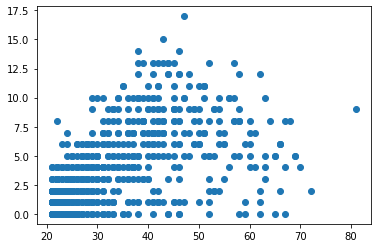

In [11]:
#1. Vẽ biểu đồ giữa age và pregnant
plt.scatter(data.age.values,data.pregnant.values)

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

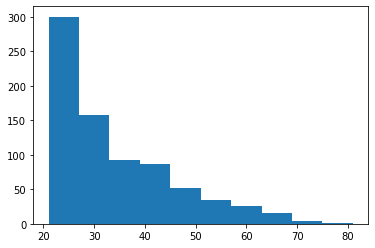

In [12]:
#2. vẽ biểu đồ sự phân phối tần suất của age
plt.hist(data.age.values)

In [13]:
features = data[['pregnant','glucose','pressure','triceps','insulin','mass','pedigree','age']]
features.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
ID,,,,,,,,
1,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
2,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
3,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
4,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
5,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [14]:
target = data[['diabetes']]
target.head()

,diabetes
ID,
1,1.0
2,0.0
3,1.0
4,0.0
5,1.0


In [15]:
#3. Split dữ liệu
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=52)
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0.])

In [16]:
#5 Kiểm tra độ chính xác
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 19]
 [21 33]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       100
         1.0       0.63      0.61      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [17]:
# Độ chính xác:
print("The prediction accuracy is: ", classifier.score(X_test, y_test)*100,"%")

The prediction accuracy is:  74.02597402597402 %


Độ chính xác của mô hình là 74%, chứng tỏ mô hình chưa thật sự hiệu quả lắm, từ đó có thể cho thấy việc đưa tất cả các biến vảo mô hình không phải là phương án tối ưu nhất, nên chọn lọc những biến quan trọng có ảnh hưởng thật sự vào để tăng độ chính xác của mô hình.

In [18]:
#7. Dự đoán những người sau có dương tính với tiểu đường hay không
prediction = classifier.predict([[8, 176, 90, 34, 300, 33.7, 0.467, 58],[1, 100, 66, 15, 56, 23.6, 0.666, 26],[12, 88, 74, 40, 54, 35.3, 0.378, 48]])
print(prediction)

[1. 0. 0.]
